In [167]:
%reset
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [168]:
from simulate import *
import random 
import numpy as np
import seaborn as sb
from collections import Counter
import matplotlib.pyplot as plt

sb.set_context(
    "talk",
    font_scale=1,
    rc={
        "lines.linewidth": 2.5,
        "text.usetex": True,
        "font.family": 'serif',
        "font.serif": ['Palatino'],
        "font.size": 16
    })

sb.set_style('white')
from matplotlib import rc
font = {'family': 'serif', 'serif': ['Palatino'], 'weight': 'bold', 'size': 16}
rc('font', **font)
rc('text', usetex=True)

In [354]:
def plot_upvote_distribution(data_list, labels_list, ax):
    
    for d,l in zip(data_list, labels_list):
        sb.kdeplot(d['data'][1], bw=0.75, label=l, ax=ax)

    ax.set_xlabel('upvotes per response')
    ax.set_ylabel('probability density')
    ax.set_title('response upvote distribution')
    ax.legend(loc='best')
    sb.despine(ax=ax)
    
def plot_upvote_quality_distribution(data_list, labels_list, ax):
    
    for d,l in zip(data_list, labels_list):
        label = "{} (pearson: {:.2f})".format(l, stats.pearsonr(*d['data'])[0])

        sb.regplot(d['data'][0], d['data'][1], x_bins=40, ci=None, 
                   scatter_kws=dict(alpha=0.2), label=label, ax=ax)
    
    
    ax.set_xlabel('response quality')
    ax.set_ylabel('average number of upvotes')
    ax.set_title('bivariate quality-upvote trend')
    ax.legend(loc='best', frameon=True)
    sb.despine(ax=ax)

In [439]:
n = 5000
p_prob = 0.8
u_prob = 0.9 

In [440]:
rq = left_skewed_response_quality
unif = run(n, p_prob, u_prob, rq, uniform_upvote_response)
qual = run(n, p_prob, u_prob, rq, quality_upvote_response)
heur = run(n, p_prob, u_prob, rq, heuristic_upvote_response)
noisy = run(n, p_prob, u_prob, rq, quality_upvote_response, add_noise=True, unif_p=0.3)
noisy_heur = run(n, p_prob, u_prob, rq, heuristic_upvote_response, add_noise=True, unif_p=0.3)

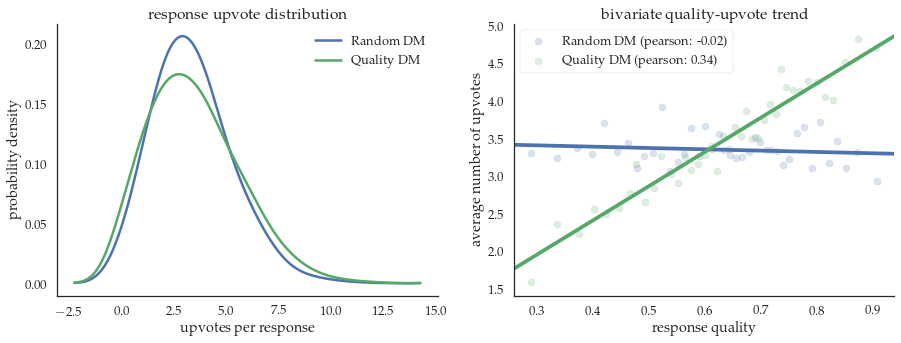

In [443]:
labels_list = ['Random DM', 'Quality DM']
data_list = [unif, qual]
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
plot_upvote_distribution(data_list, labels_list, ax=ax1)
plot_upvote_quality_distribution(data_list, labels_list, ax=ax2)

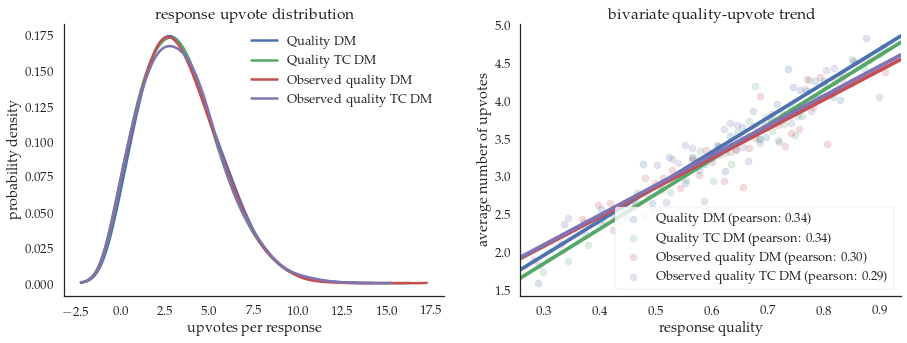

In [446]:
labels_list = ['Quality DM', 'Quality TC DM', 'Observed quality DM', 'Observed quality TC DM']
data_list = [qual, heur, noisy, noisy_heur]
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
plot_upvote_distribution(data_list, labels_list, ax=ax1)
plot_upvote_quality_distribution(data_list, labels_list, ax=ax2)

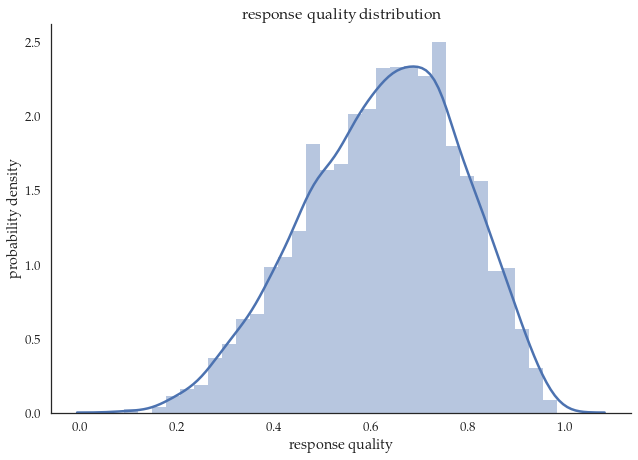

In [442]:
ax = plt.subplot()
sb.distplot(qual['data'][0], ax=ax)
ax.set_xlabel('response quality')
ax.set_ylabel('probability density')
ax.set_title('response quality distribution')
ax.legend(loc='best')
sb.despine(ax=ax)